In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from matplotlib import pyplot
import seaborn as sns
%matplotlib inline 

url='https://github.com/WalePhenomenon/climate_change/blob/master/fuel_ferc1.csv?raw=true'
fuel_data = pd.read_csv(url, error_bad_lines=False)
fuel_data.describe(include='all')

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
count,29523,29523.000000,29523.000000,29523,29523,29343,2.952300e+04,29523.000000,29523.000000,2.952300e+04,29523.000000
unique,29523,NaN,NaN,2315,6,9,NaN,NaN,NaN,NaN,NaN
top,f1_fuel_2005_12_148_1_5,NaN,NaN,big stone,gas,mcf,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,156,11486,11354,NaN,NaN,NaN,NaN,NaN
mean,NaN,118.601836,2005.806050,NaN,NaN,NaN,2.622119e+06,8.492111,208.649031,9.175704e+02,19.304354
std,NaN,74.178353,7.025483,NaN,NaN,NaN,9.118004e+06,10.600220,2854.490090,6.877593e+04,2091.540939
min,NaN,1.000000,1994.000000,NaN,NaN,NaN,1.000000e+00,0.000001,-276.080000,-8.749370e+02,-41.501000
25%,NaN,55.000000,2000.000000,NaN,NaN,NaN,1.381700e+04,1.024000,5.207000,3.778500e+00,1.940000
50%,NaN,122.000000,2006.000000,NaN,NaN,NaN,2.533220e+05,5.762694,26.000000,1.737100e+01,4.127000
75%,NaN,176.000000,2012.000000,NaN,NaN,NaN,1.424034e+06,17.006000,47.113000,4.213700e+01,7.745000


In [2]:
fuel_data.head()

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489.0,16.590,18.59,18.53,1.121
1,f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945.0,16.592,18.58,18.53,1.120
2,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683.0,24.130,39.72,38.12,1.650
3,f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484.0,23.950,47.21,45.99,1.970
4,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,gas,mcf,40533.0,1.000,2.77,2.77,2.570


In [3]:
fuel_data['fuel_qty_burned'].skew()

15.851495469109503

In [4]:
fuel_data['fuel_qty_burned'].kurtosis()

651.3694501337732

In [5]:
fuel_data.isnull().sum()

record_id                         0
utility_id_ferc1                  0
report_year                       0
plant_name_ferc1                  0
fuel_type_code_pudl               0
fuel_unit                       180
fuel_qty_burned                   0
fuel_mmbtu_per_unit               0
fuel_cost_per_unit_burned         0
fuel_cost_per_unit_delivered      0
fuel_cost_per_mmbtu               0
dtype: int64

In [6]:
(fuel_data.isnull().sum()/fuel_data.isnull().count())*100

record_id                       0.000000
utility_id_ferc1                0.000000
report_year                     0.000000
plant_name_ferc1                0.000000
fuel_type_code_pudl             0.000000
fuel_unit                       0.609694
fuel_qty_burned                 0.000000
fuel_mmbtu_per_unit             0.000000
fuel_cost_per_unit_burned       0.000000
fuel_cost_per_unit_delivered    0.000000
fuel_cost_per_mmbtu             0.000000
dtype: float64

In [7]:
fuel_data.corr()

,utility_id_ferc1,report_year,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
utility_id_ferc1,1.000000,0.093323,-0.057447,-0.066946,-0.037863,-0.016414,0.006122
report_year,0.093323,1.000000,0.012952,-0.110853,0.013599,-0.014043,0.010261
fuel_qty_burned,-0.057447,0.012952,1.000000,-0.080946,-0.018535,-0.003551,-0.001896
fuel_mmbtu_per_unit,-0.066946,-0.110853,-0.080946,1.000000,-0.010034,-0.009039,-0.005884
fuel_cost_per_unit_burned,-0.037863,0.013599,-0.018535,-0.010034,1.000000,0.011007,-0.000437
fuel_cost_per_unit_delivered,-0.016414,-0.014043,-0.003551,-0.009039,0.011007,1.000000,-0.000109
fuel_cost_per_mmbtu,0.006122,0.010261,-0.001896,-0.005884,-0.000437,-0.000109,1.000000


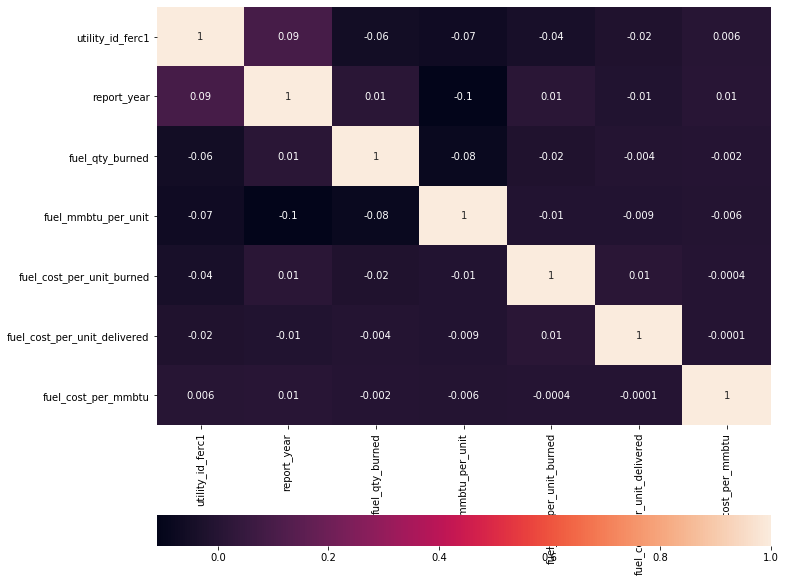

In [9]:
pyplot.figure(figsize=(11,11))
sns.heatmap(fuel_data.corr(), annot = True, fmt = '.1g', cbar_kws= {'orientation':'horizontal'})

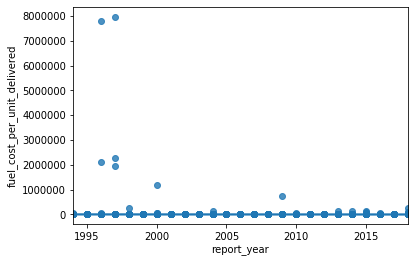

In [12]:
sns.regplot(x="report_year", y="fuel_cost_per_unit_delivered", data=fuel_data)

In [19]:
grp_test1 = fuel_data[['fuel_type_code_pudl','fuel_cost_per_unit_burned']].groupby(['fuel_type_code_pudl'],as_index=False).mean()
grp_test1.head(10)

,fuel_type_code_pudl,fuel_cost_per_unit_burned
0,coal,67.421830
1,gas,13.659397
2,nuclear,4955.157002
3,oil,168.877086
4,other,18.253856
5,waste,19.518122


In [22]:
grp_test1 = fuel_data[['report_year','fuel_cost_per_unit_delivered']].groupby(['report_year'],as_index=False).mean()
grp_test1.head(20)

,report_year,fuel_cost_per_unit_delivered
0,1994,63.636060
1,1995,32.735269
2,1996,9196.705948
3,1997,11140.197239
4,1998,287.154420
5,1999,25.551627
6,2000,985.362877
7,2001,60.050396
8,2002,47.594361
9,2003,55.663493


In [25]:
grp_test1 = fuel_data[['fuel_type_code_pudl','fuel_cost_per_unit_delivered',"report_year"]].groupby(['report_year'],as_index=False).mean()
grp_test1.head(20)

,report_year,fuel_cost_per_unit_delivered
0,1994,63.636060
1,1995,32.735269
2,1996,9196.705948
3,1997,11140.197239
4,1998,287.154420
5,1999,25.551627
6,2000,985.362877
7,2001,60.050396
8,2002,47.594361
9,2003,55.663493
